🏏 Example 1: Batsman Stats Parallel Workflow

🔹 Problem Statement

Given batsman performance:

runs, balls, fours, sixes

We calculate in parallel:

Strike Rate = (runs / balls) * 100

Boundary % = (runs from 4s & 6s / total runs) * 100

Balls per Boundary (BPB) = balls / (fours + sixes)

Finally → Summary Node combines results.

In [16]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [17]:
# State Defination
class BatsmanState(TypedDict):
    runs : int
    balls : int
    fours : int
    sixes : int
    strike_rate : float
    boundary_percent : float
    balls_per_boundary : float
    summary : str
    

In [18]:
# Define Funtion
def calculate_strike_rate(state: BatsmanState):
    runs = state['runs']
    balls = state['balls']
    strike_rate = (runs/balls)*100
    return {'strike_rate': strike_rate}

def boundary_percent(state: BatsmanState):
    boundary_runs = (state['fours']*4) + (state['sixes']*6)
    boundary_percent = (boundary_runs/state['runs'])*100
    return {'boundary_percent':boundary_percent}

def calculate_balls_per_boundary(state: BatsmanState):
    bpb = state["balls"] / (state["fours"] + state["sixes"])
    return {"balls_per_boundary": bpb}

def summary(state: BatsmanState):
    text = (
        f"Strike Rate: {state['strike_rate']:.2f}\n"
        f"Boundary %: {state['boundary_percent']:.2f}\n"
        f"Balls per Boundary: {state['balls_per_boundary']:.2f}"
    )
    return {"summary": text}


In [19]:
# Define Graph
graph = StateGraph(BatsmanState)
graph.add_node("CalculateStrikeRate", calculate_strike_rate)
graph.add_node("CalculateBoundaryPercent", boundary_percent)
graph.add_node("CalculateBPB", calculate_balls_per_boundary)
graph.add_node("Summary", summary)


In [20]:
# Define edges
graph.add_edge(START, "CalculateStrikeRate")
graph.add_edge(START, "CalculateBoundaryPercent")
graph.add_edge(START, "CalculateBPB")
graph.add_edge("CalculateStrikeRate", "Summary")
graph.add_edge("CalculateBoundaryPercent", "Summary")
graph.add_edge("CalculateBPB", "Summary")
graph.add_edge("Summary", END)

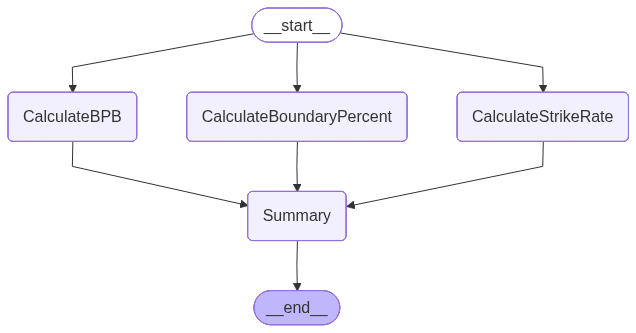

In [21]:
# Complile workflow
workflow = graph.compile()
workflow


In [22]:
# Run workflow
initial_state = {"runs": 100, "balls": 50, "fours": 6, "sixes": 4}
result = workflow.invoke(initial_state)

print(result["summary"])

Strike Rate: 200.00
Boundary %: 48.00
Balls per Boundary: 5.00
